In [3]:
:dep burn = {version = "0.12.1", features = ["ndarray", "wgpu", "candle"]}

In [4]:
:show_deps

burn = {version = "0.12.1", features = ["ndarray", "wgpu", "candle"]}


In [57]:
use burn::backend::{NdArray};
use burn::tensor::{Tensor};
use burn::tensor::backend::Backend;

## 1、实现sigmoid function
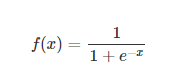
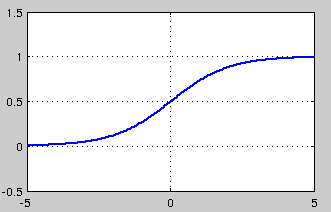

In [58]:
use burn::tensor::backend::Backend;

fn basic_sigmoid<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    return ones.clone() / (ones.clone() + (-x).exp());
}

In [67]:
let device = Default::default();
let tensor_1 = Tensor::<NdArray, 1>::from_data([-20f32, -10f32, -1f32, 0f32, 1f32, 10f32, 20f32], &device);

let result_tensor = basic_sigmoid::<NdArray, 1>(tensor_1.clone());
println!("{}", result_tensor);

Tensor {
  data:
[2.0611537e-9, 4.5397872e-5, 0.26894143, 0.5, 0.7310586, 0.9999546, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 2、实现Sigmoid gradient（梯度）
完成sigmoid的梯度函数，用它去计算sigmoid相对于其输入x的梯度
$\sigma'(x) =\sigma(x)(1-\sigma(x))$

In [60]:
fn sigmoid_derivative<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    let sigmoid = basic_sigmoid(x);

    return sigmoid.clone()*(ones.clone() - sigmoid.clone());
}

In [68]:
let ds: Tensor::<NdArray, 1> = sigmoid_derivative::<NdArray, 1>(tensor_1.clone());
println!("{}", ds);

Tensor {
  data:
[2.0611537e-9, 4.539581e-5, 0.19661194, 0.25, 0.19661193, 4.5416677e-5, 0.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 3、实现tanh function
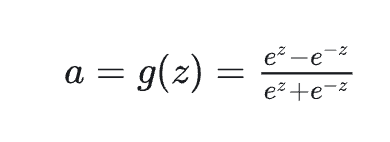
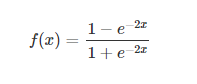
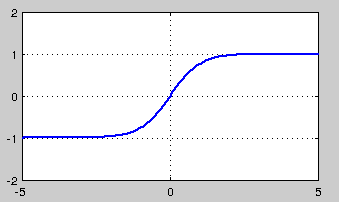

In [77]:
fn basic_tanh<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    let twos = ones.clone() + ones.clone();
    let exp = (-x.mul_scalar(2.0)).exp();
    
    return (ones.clone() - exp.clone()) / (ones.clone() + exp.clone());
}

In [78]:
let result_tensor = basic_tanh::<NdArray, 1>(tensor_1.clone());
println!("{}", result_tensor);
println!("与Tensor自带的tanh方法进行比较");
println!("{}", tensor_1.clone().tanh());

Tensor {
  data:
[-1.0, -1.0, -0.7615942, 0.0, 0.7615941, 1.0, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}
与Tensor自带的tanh方法进行比较
Tensor {
  data:
[-1.0, -1.0, -0.7615942, 0.0, 0.7615942, 1.0, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 4、实现tanh gradient（梯度）
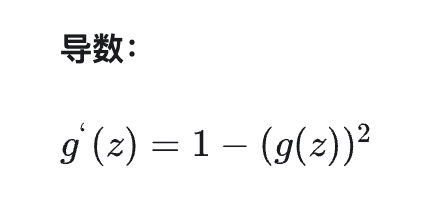

In [71]:
fn tanh_derivative<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let ones = x.ones_like();
    let tanh = basic_tanh(x);

    return ones.clone() - tanh.clone() * tanh.clone();
}

In [74]:
let ds: Tensor::<NdArray, 1> = tanh_derivative::<NdArray, 1>(tensor_1.clone());
println!("{}", ds);

Tensor {
  data:
[0.0, 0.0, 0.41997433, 1.0, 0.4199744, 0.0, 0.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 5、实现relu
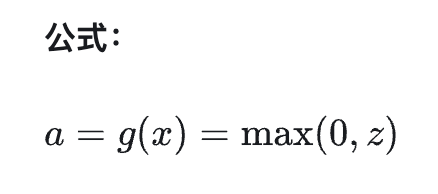
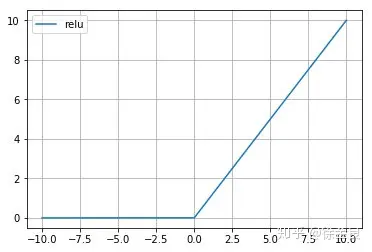

In [75]:
fn basic_relu<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    return (x.clone().abs() + x.clone()).div_scalar(2.0)
}

In [95]:
let result_tensor = basic_relu::<NdArray, 1>(tensor_1.clone());
println!("{}", result_tensor);

Tensor {
  data:
[0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 20.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 6、实现relu gradient（梯度）
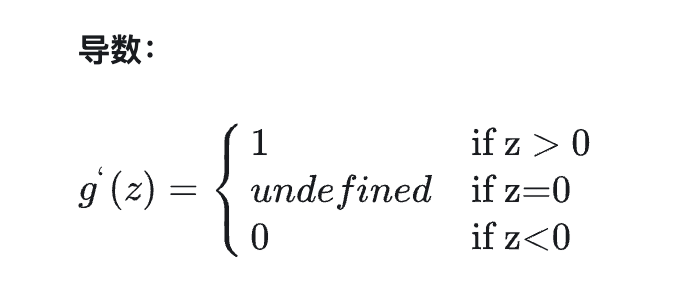

In [84]:
fn relu_derivative<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let relu = basic_relu(x);
    let mask = relu.clone().greater_elem(0.0);
    
    return relu.clone().mask_fill(mask, 1);
}

In [85]:
let ds: Tensor::<NdArray, 1> = relu_derivative::<NdArray, 1>(tensor_1.clone());
println!("{}", ds);

Tensor {
  data:
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 7、实现Leaky relu
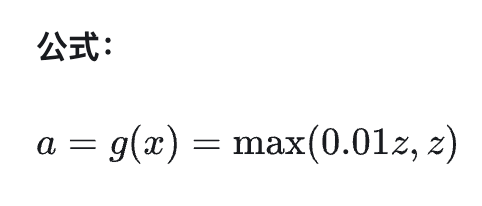
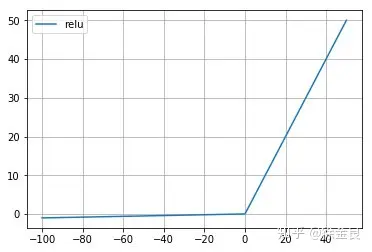

In [96]:
fn basic_leaky_relu<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let mask = x.clone().lower_elem(0.0);
    let ones = x.clone().ones_like();

    return x * ones.mask_fill(mask, 0.01);
}

In [97]:
let result_tensor = basic_leaky_relu::<NdArray, 1>(tensor_1.clone());
println!("{}", result_tensor);

Tensor {
  data:
[-0.19999999, -0.099999994, -0.01, 0.0, 1.0, 10.0, 20.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}


## 8、实现leaky relu gradient（梯度）
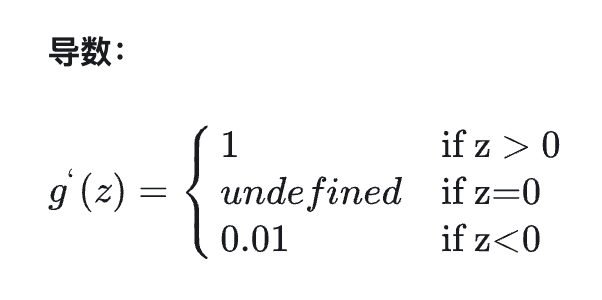

In [92]:
fn leaky_relu_derivative<B: Backend, const D: usize>(x: Tensor<B, D>) -> Tensor<B, D> {
    let relu = basic_relu(x);
    let mask1 = relu.clone().greater_elem(0.0);
    let mask2 = relu.clone().lower_equal_elem(0.0);
    
    return relu.clone().mask_fill(mask1, 1).mask_fill(mask2, 0.01);
}

In [93]:
let ds: Tensor::<NdArray, 1> = leaky_relu_derivative::<NdArray, 1>(tensor_1.clone());
println!("{}", ds);

Tensor {
  data:
[0.01, 0.01, 0.01, 0.01, 1.0, 1.0, 1.0],
  shape:  [7],
  device:  Cpu,
  backend:  "ndarray",
  kind:  "Float",
  dtype:  "f32",
}
